# Linear regression

## Using Normal Equation and SVD approaches.

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100, 1)

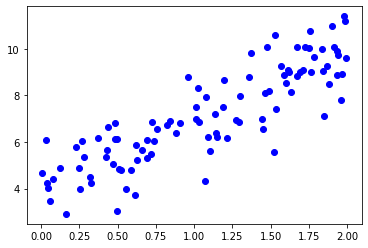

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, y, "bo")
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.96606521],
       [2.93076098]])

In [10]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.96606521],
       [9.82758716]])

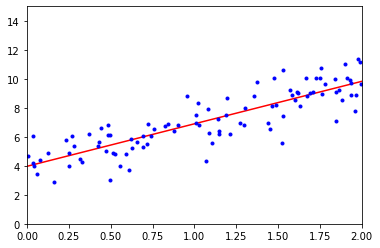

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.96606521] [[2.93076098]]
[[3.96606521]
 [9.82758716]]


In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.96606521],
       [2.93076098]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[3.96606521],
       [2.93076098]])

# NE and SVD get very slow when the number of features grows lagre(100k)
# the O(n) of inverting matrix is about 2.4 ~ 3
# Looking other way to train LinearRegression, which is better suited when number of features are large

## --------------------------------
# Gradient Descent